In [1]:
import numpy as np
import imageio
import matplotlib.pyplot as plt

In [2]:
# Computes the 2D discrete Fourier transform
def DFT2D(f):
    # create empty array of complex coefficients
    F = np.zeros(f.shape, dtype=np.complex64)
    n,m = f.shape[0:2]
    
    # creating indices for x, to compute multiplication using numpy (f*exp)
    x = np.arange(n)
    # for each frequency 'u,v'
    for u in np.arange(n):
        for v in np.arange(m):
            for y in np.arange(m):
                F[u,v] += np.sum(f[:,y] * np.exp( (-1j*2*np.pi) * (((u*x)/n)+((v*y)/m)) ))
                
    return F/np.sqrt(n*m)

In [3]:
# Computes the inverse 2D discrete Fourier transform
def inverse_DFT2D(F):
    
    f = np.zeros(F.shape, dtype=np.complex64)
    n,m = f.shape[0:2]
    
    x = np.arange(n)
    
    for u in np.arange(n):
        for v in np.arange(m):
            for y in np.arange(m):
                f[u, v] += np.sum(F[:,y] * np.exp( (1j*2*np.pi) * (((u*x)/n)+((v*y)/m)) ))
    
    return f/np.sqrt(n*m)

In [4]:
daniel = imageio.imread("images/gradient_noise_small.png")

F = DFT2D(daniel)
blob = inverse_DFT2D(F)

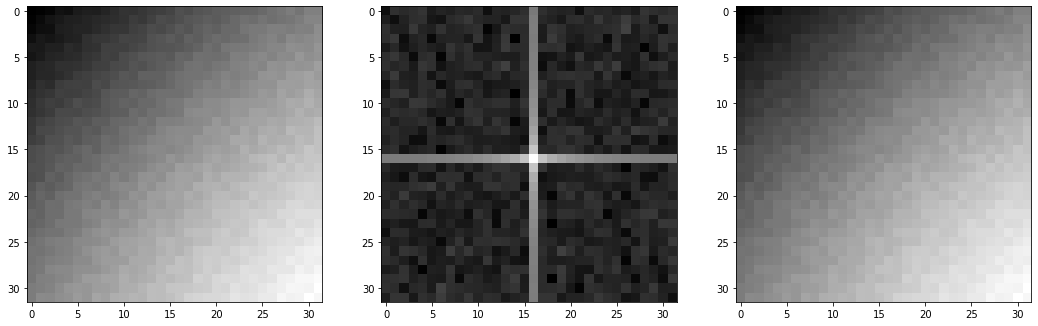

In [9]:
plt.figure(figsize=(18,10))

plt.subplot(131)
plt.imshow(daniel, cmap='gray')

plt.subplot(132)
plt.imshow(np.log(1 + np.fft.fftshift(np.abs(F))), cmap='gray')

plt.subplot(133)
plt.imshow(abs(blob), cmap='gray')

**Exercise**: implement the Inverse Transforms for the 1D and 2D cases. Perform the DFT and its inverse, and compare the original and the inverted images, by computing the RMSE (Root mean square error) between the images.

The Inverse Discrete Fourier Transforms are given by the following equations. Note the inverted signal for the imaginary unit:

$$f(x,y) = \frac{1}{\sqrt{nm}}\sum_{u=0}^{n-1} \sum_{v=0}^{m-1} F(u,v) e^{j 2\pi [(u x)/n + (v y)/m]}$$

Normal discrete fourier transform:

$$F(u,v) = \frac{1}{\sqrt{nm}}\sum_{x=0}^{n-1} \sum_{y=0}^{m-1} f(x,y) e^{-j 2\pi [(u x)/n + (v y)/m]}$$